In [1]:
from IPython.core.display import HTML
with open('../style.css') as file:
    css = file.read()
HTML(css)

# Implementing Priority Queues as Heaps

Ths notebook presents <em style="color:blue">heaps</em>.  We define the set $\mathcal{H}$ of heaps by induction:

  - $\texttt{Nil} \in \mathcal{H}$.
  - $\texttt{Node}(p,v,l,r) \in \mathcal{H}$ if and only if the following is true:
      * $p \leq l \;\wedge\; p \leq r$

        The priority stored at the root is less than or equal to every other priority stored in
        the heap. This condition is known as the *heap condition*.
        
        It is important to remember that we associate *high* priorities
        with *small* numbers.
      * $\mid l.\texttt{count}() - r.\texttt{count}() \mid \;\leq\, 1$

        The number of elements in the left subtree differs from the number of elements stored in
        the right subtree by at most one.
        This condition is called the  *balancing condition*.  
      * $l \in \mathcal{H} \;\wedge\; r \in \mathcal{H}$
      
        Both the left and the right subtree of a heap are themselves heaps.

The class `Heap` is a *superclass* for constructing heaps.  We will later define the classes `Nil` and `Node` that represent heaps of the form $\texttt{Nil}$ and $\texttt{Node}(p, v, l, r)$ respectively. 
* The class `Heap` has one static variable `sNodeCount` which is needed to assign unique identifiers to different nodes.  
  Every object of the class `Heap` has a uniques identifier `mID` that is stored as a member variable.  This identifier is used 
  by `graphviz` in order to display a heap as a tree.  
* In order to generate new identifiers we use the static variable `sNodeCount` as a counter.  
  Every time a new node is created this counter is incremented.  

In [2]:
class Heap:
    sNodeCount = 0
    
    def __init__(self):
        Heap.sNodeCount += 1
        self.mID = str(Heap.sNodeCount)
        
    def getID(self):
        return self.mID  # used only by graphviz

The function `make_string` is a helper function that is used to simplify the implementation of the method `__str__`.
  - `self` is the object that is to be rendered as a string
  - `attributes` is a list of the names of those member variables of the object `self`         that are used to create the string that is returned.

In [3]:
def _make_string(self, attributes):
        # get the name of the class of the object self
        name = self.__class__.__name__
        # call the function str for all attributes and join the resulting strings with a comma
        return f"{name}({', '.join(map(str, [getattr(self, at) for at in attributes]))})"
    
Heap._make_string = _make_string

## Graphical Representation

In [4]:
import graphviz as gv

The method $t.\texttt{toDot}()$ takes a binary trie $t$ and returns a graph `dot` that represents $t$.  

This graph can be rendered visually as a tree via the command `display(dot)`.

In [5]:
def toDot(self):
    dot = gv.Digraph(node_attr={'shape': 'record', 'style': 'rounded'})
    nodeDict = {}  # assign node identifiers to tree nodes
    self._collectIDs(nodeDict)
    for n, t in nodeDict.items():
        if isinstance(t, Nil):
            dot.node(n, label='', shape='point') 
        elif isinstance(t, Node):
            if t.mValue != None:
                dot.node(n, label='{' + str(t.mPriority) + '|' + str(t.mValue) + '}')
            else:
                dot.node(n, label= str(t.mPriority))
        else:
            assert False, f'Unknown node {t}'
    for n, t in nodeDict.items():
        if isinstance(t, Node):
            dot.edge(n, t.mLeft .getID())
            dot.edge(n, t.mRight.getID())
    return dot

Heap.toDot = toDot

The method $t.\texttt{collectIDs}(d)$ takes a binary trie $t$ and a dictionary $d$ and updates the dictionary $d$ so that the following holds:
$$ d[\texttt{id}] = n \quad \mbox{for every node $n$ in $t$ such that $\texttt{id}$ is the identifier of node $n$.} $$
Here, $\texttt{id}$ is the unique identifier of the node $n$, i.e. $d$ maps the identifiers to their corresponding nodes.

In [6]:
def _collectIDs(self, nodeDict):
    nodeDict[self.getID()] = self
    if isinstance(self, Node):
        self.mLeft ._collectIDs(nodeDict)
        self.mRight._collectIDs(nodeDict)
        
Heap._collectIDs = _collectIDs

## Defining $\texttt{Nil}$ and $\texttt{Node}(p, v, l, r)$ as Classes

The class `Nil` represents an empty heap.  
* As there are no member variables to maintain, the class does not a proper constructor.
  The default constructor is sufficient.
* The function `_count` returns the number of nodes in the tree, which, for the node `Nil`, is `0`.
* The function `__str__` returns a string representation that is useful for debugging purposes.

In [7]:
class Nil(Heap):
    def _count(self):
        return 0
    
    def __str__(self):
        return 'Nil()'

The class `Node` represents a heap of the form $\texttt{Node}(p,v,l,r)$ where
  - $p$ is the *priority* stored as `mPriority`,
  - $v$ is the *value* stored as `mValue`,
  - $l$ is the *left subtree* stored as `mLeft`,
  - $r$ is the *right subtree* stored as `mRight`,
  - The total number of nodes of the tree is stored in the member variable `mCount`.

In [8]:
class Node(Heap):
    def __init__(self, priority, value, left, right):
        Heap.__init__(self)
        self.mPriority = priority
        self.mValue    = value
        self.mLeft     = left
        self.mRight    = right
        self.mCount    = left._count() + right._count() + 1
        
    def _extract(self):
        return self.mPriority, self.mValue, self.mLeft, self.mRight
    
    def _count(self):
        return self.mCount
    
    def __str__(self):
        return _make_string(self, ['mPriority', 'mValue', 'mLeft', 'mRight'])

## Implementing the Method  `top`

For the class `Nil`, the function `top`is specified via a single equation:
 - $\texttt{Nil}.\texttt{top}() = \Omega$

In [9]:
def top(self):
    return None

Nil.top = top
del top

For the class `Node`, the function `top` is specified via the following equation:
- $\texttt{Node}(p,v,l,r).\texttt{top}() = \langle p,v \rangle$

In [10]:
def top(self):
    return self.mPriority, self.mValue

Node.top = top
del top

## Implementing the method `insert`

The method `self.insert(p, v)` takes three parameters:
* `self` is an object of the abstract class `Heap` that either has the class `Nil` or `Node`.
* `p` is a priority.  
* `v` is some value that has the priority `p`. 

`self.insert(p, v)` returns the heap that results from inserting the value `v` with priority `p` into the heap `self`.

In the class `Nil` the method `insert` is specified as follows:
- $\texttt{Nil}.\texttt{insert}(p,v) = \texttt{Node}(p,v,\texttt{Nil}, \texttt{Nil})$

In [11]:
def insert(self, p, v):
    return Node(p, v, Nil(), Nil())

Nil.insert = insert
del insert

In the class `Node` the method `insert` is specified as follows:
  - $p_{\mathrm{top}} \leq p \;\wedge\; l.\texttt{count}() \leq r.\texttt{count}() \;\rightarrow\; 
     \texttt{Node}(p_{\mathrm{top}},v_\mathrm{top},l,r).\texttt{insert}(p,v) =
     \texttt{Node}\bigl(p_\mathrm{top},v_\mathrm{top},l.\texttt{insert}(p,v), r\bigr)$               
  - $p_{\mathrm{top}} \leq p \;\wedge\; l.\texttt{count}() > r.\texttt{count}() \;\rightarrow 
     \texttt{Node}(p_{\mathrm{top}},v_\mathrm{top},l,r).\texttt{insert}(p,v) =
     \texttt{Node}\bigl(p_\mathrm{top},v_\mathrm{top},l,r.\texttt{insert}(p,v)\bigr)$
  - $p_{\mathrm{top}} > p \;\wedge\; l.\texttt{count}() \leq r.\texttt{count}() \;\rightarrow 
     \texttt{Node}(p_{\mathrm{top}},v_\mathrm{top},l,r).\texttt{insert}(p,v) =
     \texttt{Node}\bigl(p,v,l.\texttt{insert}(p_\mathrm{top},v_\mathrm{top}), r\bigr)$
  - $p_{\mathrm{top}} > p \;\wedge\; l.\texttt{count}() > r.\texttt{count}() \;\rightarrow 
     \texttt{Node}(p_{\mathrm{top}},v_\mathrm{top},l,r).\texttt{insert}(p,v) =
     \texttt{Node}\bigl(p,v,l,r.\texttt{insert}(p_\mathrm{top},v_\mathrm{top})\bigr)$

In [12]:
def insert(self, p, v):
    p_top, v_top, l, r = self._extract()
    if p_top <= p:
        if l._count() <= r._count():
            return Node(p_top, v_top, l.insert(p, v), r)
        else:
            return Node(p_top, v_top, l, r.insert(p, v))
    else:
        if l._count() <= r._count():
            return Node(p, v, l.insert(p_top, v_top), r)
        else:
            return Node(p, v, l, r.insert(p_top, v_top))

Node.insert = insert
del insert

## Implementing the Method  `remove`

The method `self.remove()` takes one parameters:
* `self` is an object of the abstract class `Heap` that either has the class `Nil` or `Node`.

The method `self.remove()` returns the heap that results if the value with the highest priority in the heap `self` is removed from `self`.

In the class `Nil` the method `remove` is specified as follows:
- $\texttt{Nil}.\texttt{remove}() = \texttt{Nil}$

In [13]:
def remove(self):
    return self

Nil.remove = remove
del remove

In the class `Node` the method `remove` is specified as follows:
- $\texttt{Node}(p,v,\texttt{Nil},r).\texttt{remove}() = r$
- $\texttt{Node}(p,v,l,\texttt{Nil}).\texttt{remove}() = l$
- $l = \texttt{Node}(p_1,v_1,l_1,r_1) \;\wedge\; r = \texttt{Node}(p_2,v_2,l_2,r_2) \;\wedge\; p_1 \leq p_2 \;\rightarrow
       \texttt{Node}(p,v,l,r).\texttt{remove}() =      \texttt{Node}(p_1,v_1,l.\texttt{remove}(),r)$
- $l = \texttt{Node}(p_1,v_1,l_1,r_1) \;\wedge\; r = \texttt{Node}(p_2,v_2,l_2,r_2) \;\wedge\; p_1 > p_2 \rightarrow
       \texttt{Node}(p,v,l,r).\texttt{remove}() = \texttt{Node}(p_2,v_2,l,r.\texttt{remove}())$
       
Note that the heap returned by the method `remove` might violate the balancing condition.  As heaps only shrink when `remove` is called,
this fact does not cause performance problems.

In [15]:
def remove(self):
    p, v, l, r = self._extract()
    if isinstance(l, Nil):
        return r
    if isinstance(r, Nil):
        return l
    p1, v1, _, _ = l._extract()
    p2, v2, _, _ = r._extract()
    if p1 <= p2:
        return Node(p1, v1, l.remove(), r)
    else:
        return Node(p2, v2, l, r.remove())
    
Node.remove = remove
del remove

## Testing

Below are some simple tests to check whether the methods `insert` and `delete` work as expected. 

In [16]:
h = Nil()
h.toDot()

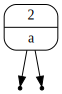

In [17]:
h = h.insert(2, 'a')
h.toDot()

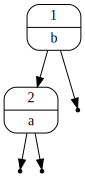

In [18]:
h = h.insert(1, 'b')
h.toDot()

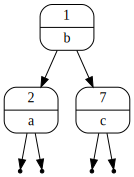

In [19]:
h = h.insert(7, 'c')
h.toDot()

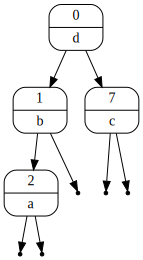

In [20]:
h = h.insert(0, 'd')
h.toDot()

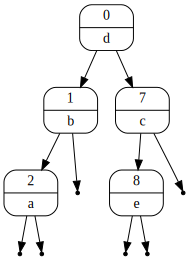

In [21]:
h = h.insert(8, 'e')
h.toDot()

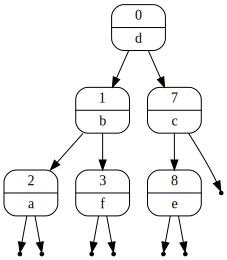

In [22]:
h = h.insert(3, 'f')
h.toDot()

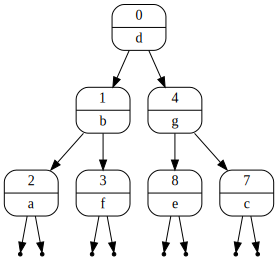

In [23]:
h = h.insert(4, 'g')
h.toDot()

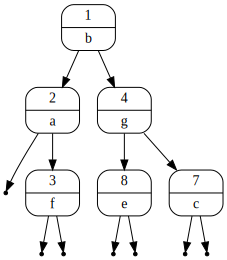

In [24]:
h = h.remove()
h.toDot()

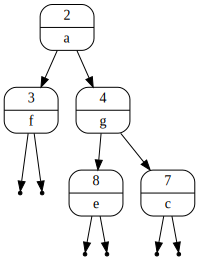

In [25]:
h = h.remove()
h.toDot()

Note that the balancing condition is violated above.

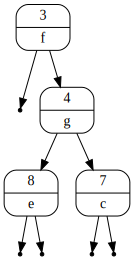

In [26]:
h = h.remove()
h.toDot()

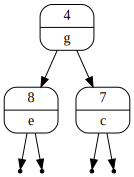

In [27]:
h = h.remove()
h.toDot()

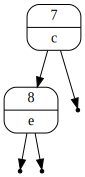

In [28]:
h = h.remove()
h.toDot()

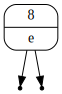

In [29]:
h = h.remove()
h.toDot()

In [30]:
h = h.remove()
h.toDot()

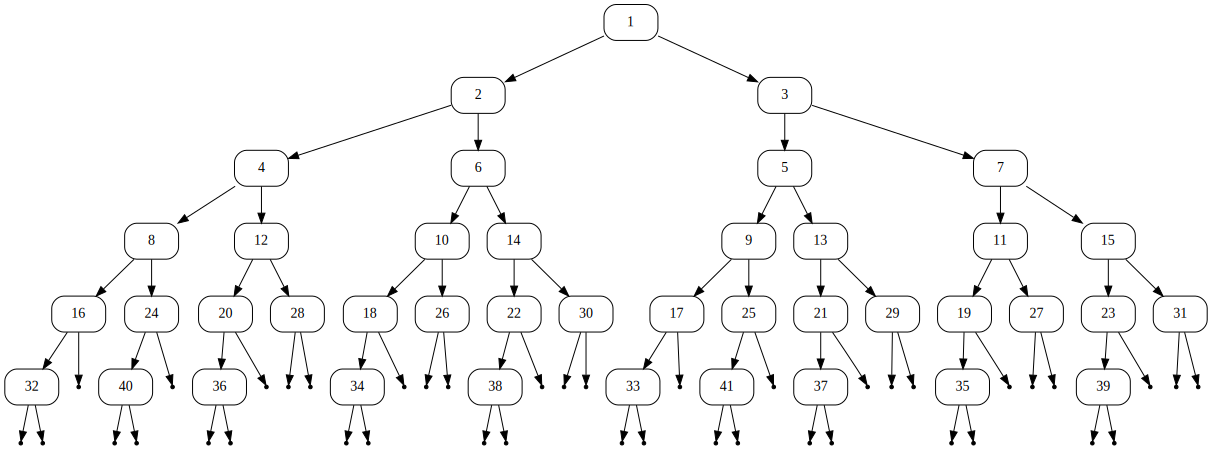

In [31]:
h = Nil()
for i in range(1, 42):
    h = h.insert(i, None)
h.toDot()

In [32]:
import random as rnd

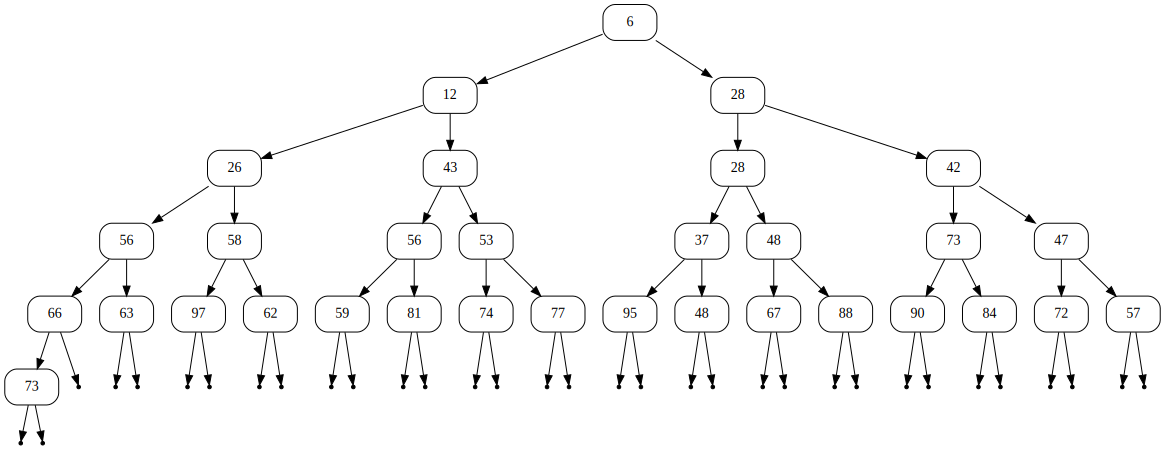

In [33]:
h = Nil()
for i in range(1, 33):
    k = rnd.randrange(1, 100)
    h = h.insert(k, None)
h.toDot()

## Heapsort

Given a list `L`, the function `heap_sort(L, visualize)` returns a sorted version of `L`.  The algorithm works in two phases.
- In the first phase, all elements of the list `L` are inserted as priorities into the heap `H`, which is initially empty.

  If the parameter `visualize` is `True`, then the heap `H`is displayed as a tree.

- In the second phase, the elements of `H` are extracted one by one beginning with the smallest elements.  These elements
  are appended to the list `S`, which is initially empty. When the function returns, `S` contains all the elements of `L`
  and these elements are ascending in `S`.

In [34]:
def heap_sort(L, visualize=False):
    H = Nil()
    for p in L:
        H = H.insert(p, None)
    S = []
    if visualize:
        display(H.toDot())
    while isinstance(H, Node):
        p, _ = H.top()
        S.append(p)
        H = H.remove()
    return S

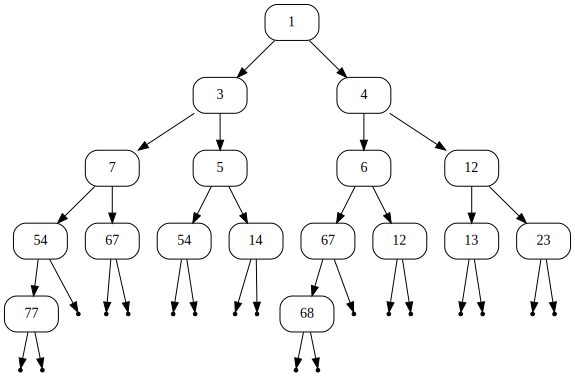

[1, 3, 4, 5, 6, 7, 12, 12, 13, 14, 23, 54, 54, 67, 67, 68, 77]

In [35]:
heap_sort([77, 54, 68, 7, 13, 1, 4, 5, 6, 3, 12, 67, 12, 14, 23, 54, 67], visualize=True)

## Some More Testing

In [36]:
import random as rnd

In [37]:
def isOrdered(L):
    for i in range(len(L) - 1):
        assert L[i] <= L[i+1]

In [38]:
from collections import Counter

In [39]:
def sameElements(L, S):
    assert Counter(L) == Counter(S)

The function $\texttt{testSort}(n, k)$ generates $n$ random lists of length $k$, sorts them, and checks whether the output is sorted and contains the same elements as the input.

In [40]:
def testSort(n, k):
    for i in range(n):
        L = [ rnd.randrange(2*k) for x in range(k) ]
        oldL = L[:]
        S = heap_sort(L)
        isOrdered(S)
        sameElements(S, oldL)
        assert len(S) == len(oldL)
        print('.', end='')
    print()
    print("All tests successful!")

In [41]:
%%time
testSort(100, 5_000)

....................................................................................................
All tests successful!
CPU times: user 22.1 s, sys: 84.6 ms, total: 22.2 s
Wall time: 22.2 s


Next, we sort hundred thousand random integers.  As we have stored information for displaying heaps a s trees, the function `heap_sort` isn't really competitive.

In [42]:
%%time
k = 100_000
L = [ rnd.randrange(2 * k) for x in range(k) ]
S = heap_sort(L)

CPU times: user 8.43 s, sys: 41.6 ms, total: 8.47 s
Wall time: 8.48 s
